# ***Avaliação - 02***
---

## **Imagens de Teste**
---

In [1]:
import os

if not os.path.isdir('image_processing_tools'):
    !git clone https://github.com/kevinruiz182/image_processing_tools

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 24.33 MiB/s, done.
Resolving deltas: 100% (15/15), done.


## **Bibliotecas**
---

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show(img, figsize=(20, 10)):
    if type(img) is list:
        if figsize is None:
            figsize = (5 * len(img), 8)

        fig, ax = plt.subplots(1, len(img), figsize=figsize)

        for i in range(len(img)):
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].imshow(img[i], cmap="gray")
    else:
        fig = plt.figure(figsize=figsize)

        ax = fig.add_subplot(1, 1, 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img, cmap="gray")

    plt.show()

## **Questão 10**
---

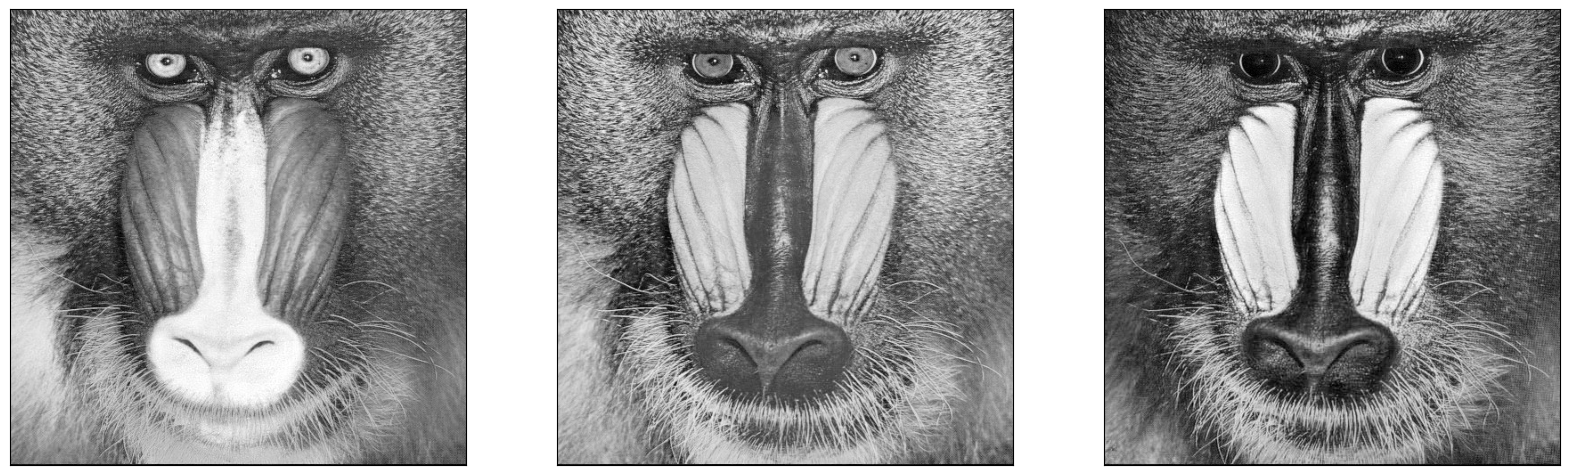

In [7]:
# Image Path
img_path = './image_processing_tools/images/fundamentals/baboon.jpg'

# Load Image
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Convert Image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Slice Color Channels
r, g, b = cv2.split(img)

# Show Color Channels in Grayscale
show([r, g, b])

In [8]:
# Calculate the Average Intensity for Each of The RGB Channels
avg_r, avg_g, avg_b = np.mean(r), np.mean(g), np.mean(b)

# Calculate the Average Intensity for Each of The CMY Channels
avg_c, avg_m, avg_y = 255 - avg_r, 255 - avg_g, 255 - avg_b


In [9]:
# Show Results
print('R: %d; G: %d; B: %d' % (avg_r, avg_g, avg_b))
print('C: %d; M: %d; Y: %d' % (avg_c, avg_m, avg_y))

R: 137; G: 128; B: 113
C: 117; M: 126; Y: 141


## **Questão 11**
---

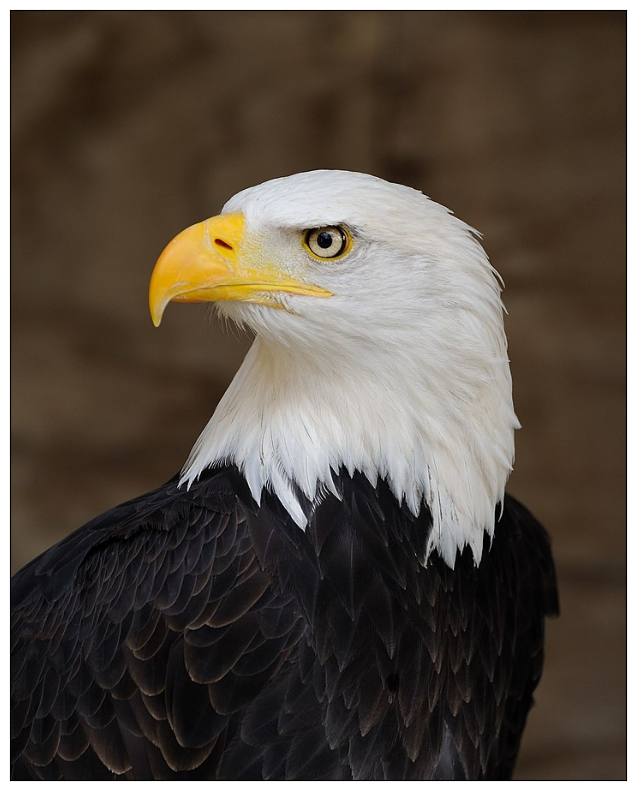

In [16]:
# Image Path
img_path = './image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg'

# Load Image
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
rows, cols = img.shape[0], img.shape[1]

# Convert Image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show Image
show(img)

In [17]:
# Euclidean Distance
def distance(c1, c2):
    return ((c2[0] - c1[0]) ** 2 + (c2[1] - c1[1]) ** 2 + (c2[2] - c1[2]) ** 2) ** 0.5

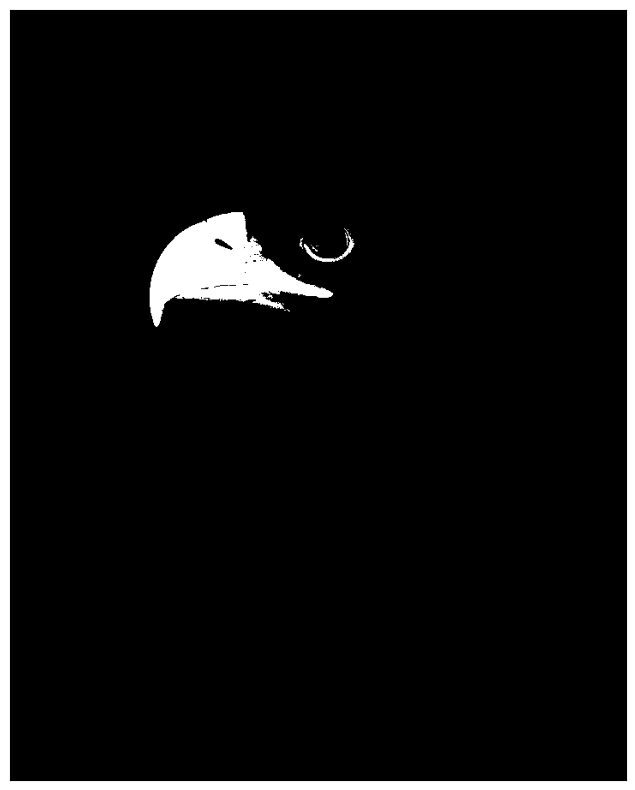

In [19]:
# Threshold Distance
threshold = distance((0, 0, 0), (100, 100, 100))

# Create a Mask
mask = np.zeros((rows, cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        mask[i, j] = 1 if distance(img[i, j], (255, 255, 0)) <= threshold else 0

# Show Image
show(mask)

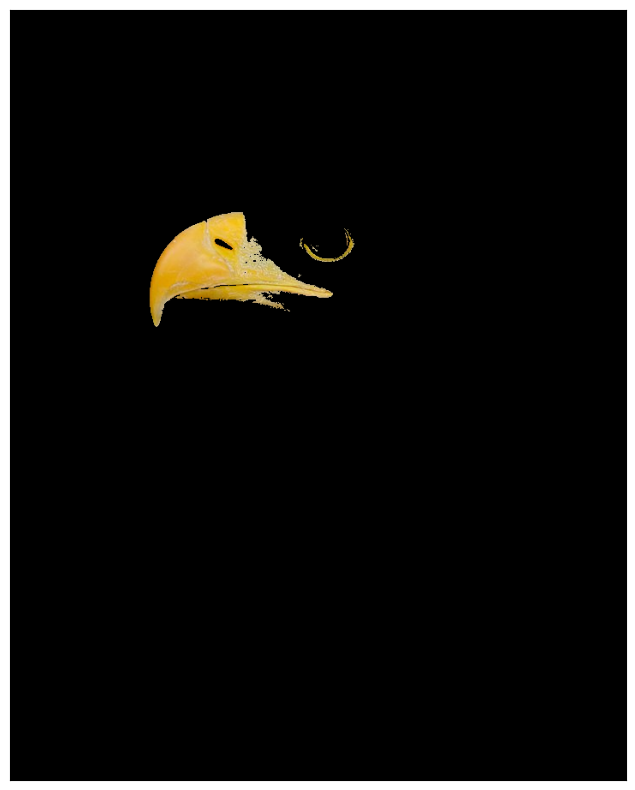

In [22]:
# Apply the Mask to Segment the Bald Eagle's Beak
beak = cv2.bitwise_and(img, img, mask=mask)

# Show Image
show(beak)

In [24]:
# Calculate the Average Distance of the Colors in The Segmented Region to The Color (255, 255, 0)
avg_distance = 0

for i in range(rows):
    for j in range(cols):
        if mask[i, j] == 1:
          avg_distance += distance(img[i, j], (255, 255, 0))

avg_distance /= np.sum(mask)
print("Average Distance: %d" % avg_distance)

Average Distance: 123


## **Questão 12**
---

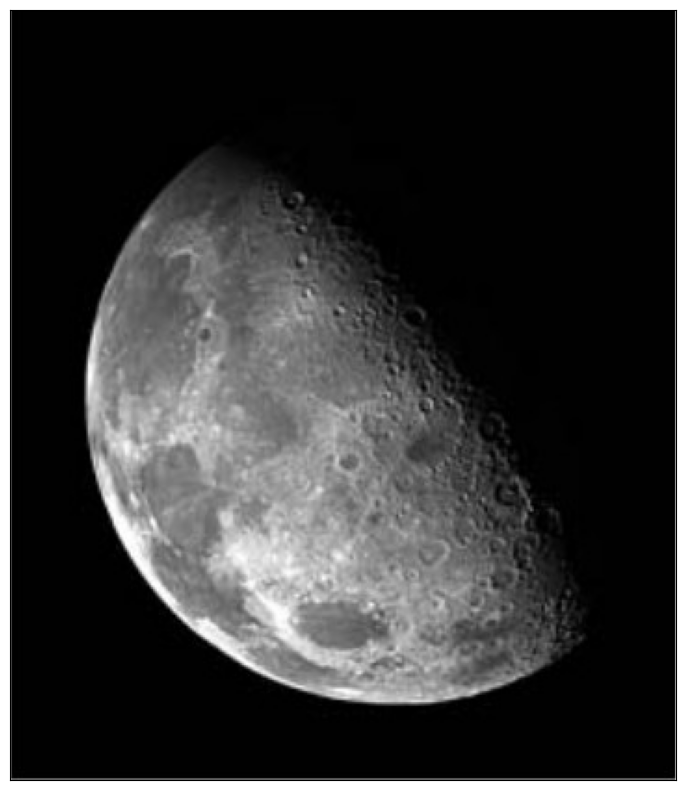

In [25]:
# Image Path
img_path = './image_processing_tools/images/spatial/moon.jpg'

# Load Image
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
rows, cols = img.shape[0], img.shape[1]

# Convert Image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show Image
show(img)

In [26]:
# Change 'dtype' to 'int'
img = img.astype(int)

# Sum the 3 Channels of The Original Image
img = np.sum(img, axis=2)

# Normalize the Result Using the Function Below
normalize = lambda v: (255 * (v - v.min()) / (v.max() - v.min())).astype(int)
img = normalize(img)

# Divide the Output Image by 255
img = img / 255

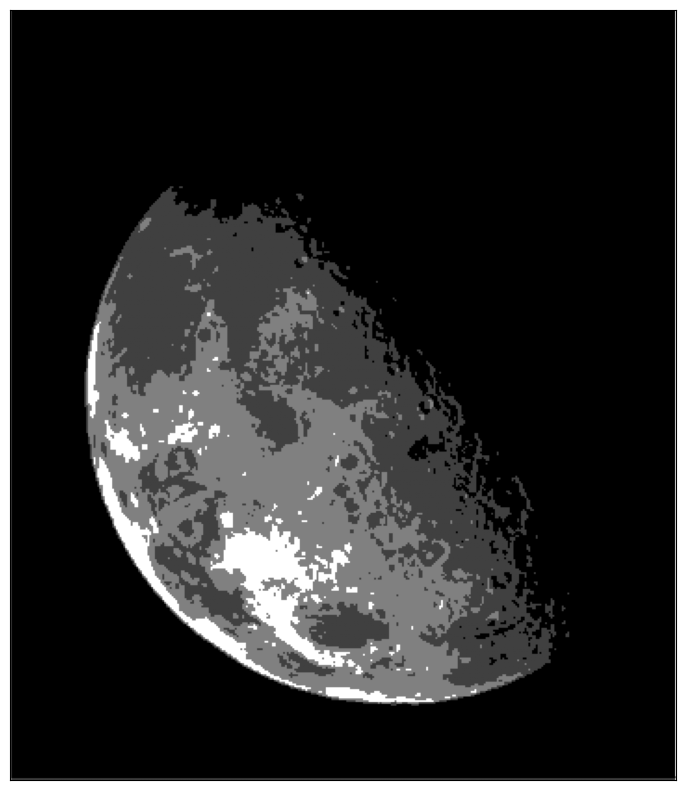

In [27]:
# Follow the Procedure Below
for i in range(rows):
    for j in range(cols):
        if img[i, j] < 0.25:
            img[i, j] = 0
        elif img[i, j] < 0.5:
            img[i, j] = 0.25
        elif img[i, j] < 0.75:
            img[i, j] = 0.5
        else:
            img[i, j] = 1

# Show Result
show(img)

In [28]:
# Calculate the Average Intensity of The Pixels in the Final Image
np.mean(img)

0.13159378460918886